# E1) AIFFEL PROJECT_Rock_Scissor_Paper

###### KEY WORD: 데이터 불러오기,크기 조절, 데이터학습, 데이터 검증, 딥러닝 네트워크 설계

### 데이터 불러오기+ resize 하기

* PIL라이브러리설치-가위,바위,보 이미지 크기변경
* 데이터 resize할때 이미지 크기가 작아지지 않아서 고생했다. 
* 팀원들과 비교해봤더니 내 LMS 노드에는 이미지를 jpg로 불러오는 코드가 없었다. 
그래서 팀원들 도움을 받아서 아래 코드를 입력했다. 
* images =glob.glob(image_dir_path + "/*.jpg")

In [30]:
import numpy as np

In [31]:
!pip install pillow   
import matplotlib.pyplot as plt
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [78]:
# import os
# image_dir_path = os.getenv("HOME") + "/aiffel/train_dataset_total/scissor"
# print("이미지 디렉토리 경로: ", image_dir_path)
# images =glob.glob(image_dir_path + "/*.jpg")
# target_size=(28,28)
# for img in images:
#     old_img=Image.open(img)
#     new_img=old_img.resize(target_size,Image.ANTIALIAS)
#     new_img.save(img,"JPEG")

# print("가위 이미지 resize 완료!")

-- 이미디 디렉토리 경로: /home/aiffel/-사용자의 이름 /aiffel/ -상위폴더 /rock_scissor_paper/scissor-하위폴더

In [79]:
# import os
# image_dir_path = os.getenv("HOME") + "/aiffel/train_dataset_total/rock"
# print("이미지 디렉토리 경로: ", image_dir_path)
# images =glob.glob(image_dir_path + "/*.jpg")

# target_size=(28,28)
# for img in images:
#     old_img=Image.open(img)
#     new_img=old_img.resize(target_size,Image.ANTIALIAS)
#     new_img.save(img,"JPEG")

# print("바위 이미지 resize 완료!")

__이미지 크기가 안줄어들어서 상대경로 설정에서 절대경로로 변경했다. 

In [80]:
# import os,glob
# # image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# image_dir_path = "/home/aiffel/aiffel/train_dataset_total/paper"
# print("이미지 디렉토리 경로: ", image_dir_path)

# images =glob.glob(image_dir_path + "/*.jpg")
# target_size=(28,28)
# for img in images:
#     old_img=Image.open(img)
#     new_img=old_img.resize(target_size,Image.ANTIALIAS)
#     new_img.save(img,"JPEG")

# print("보자기 이미지 resize 완료!")

### 딥러닝 네트워크  만들기

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [33]:
def load_data(img_path):
    number_of_data = 0 
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        number_of_data+=1
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        number_of_data+=1
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        number_of_data+=1
    # 위 반복문을 실행하면 전체 이미지 파일 개수를 알 수 있다. 
    
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는",idx,"입니다.")
    return imgs, labels

In [34]:
# 데이터를 다시 섞은 후에 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/train_dataset_total/*"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print(image_dir_path)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

이미지 개수는 14700 입니다.
/home/aiffel/aiffel/train_dataset_total/*
x_train shape: (14700, 28, 28, 3)
y_train shape: (14700,)


__위에 코드 입력할땐 이미지 개수가 계속 0이 떠서 경로를 한참 해맸다.
rock_scissor_paper 파일이 다른 곳에 2개 있어서 경로 정리를 했다. 
이 과정에서 파일경로 설정하는게 중요함을 인식했다. 

### 딥러닝 네트워크 설계!! (세번째 시도)

*처음 시도
* 내가 가진 data 300장, 다른 데이터 300장으로 검증했을때 정확도가 0.29가 나왔다.
* 데이터의 양이 적어서 정확도가 떨어지는 거라고 판단했다.
* 슬렉에 공유된 데이터를 활용해서 train data를 14701장으로 늘렸다.

*두번째 시도
* train data 14700장으로 늘림 test data 300장 - 정확도: 0.4
* 정확도가 높아지지 않았다.

*세번째 시도
* 코드상 문제는 없는거 같아서 데이터를 섞어봤다.
* 데이터 수는 동일하지만 안에 들어있는 내용물은 다르다.
* 하이퍼 파라미터를 바꾸며 정확도를 높이는 시도를 했다.
* 과연 이번엔...?

### 더 좋은 네트워크 만들어보기
* 하이퍼파라미터 바꾸기
* n_channel_1=16 
* n_channel_2=32
- 얼마나 다양한 이미지의 특징을 살펴볼건지, 입력이미지가 다양할수록 더 많은 특징 고려
* n_dense=32
-분류기 알고리즘의 복잡도 : 복잡한 문제일수록 수를 늘린다.
* n_train_epoch=3
- 분류기의 class 수 

In [44]:
#딥러닝 네트워크 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

### 딥러닝 네트워크 학습!!

In [45]:
#딥러닝 네트워크 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
460/460 [==============================] - 4s 8ms/step - loss: 1.9046 - accuracy: 0.4814
Epoch 2/15
460/460 [==============================] - 4s 8ms/step - loss: 0.7285 - accuracy: 0.6558
Epoch 3/15
460/460 [==============================] - 4s 8ms/step - loss: 0.4539 - accuracy: 0.8096
Epoch 4/15
460/460 [==============================] - 4s 8ms/step - loss: 0.2621 - accuracy: 0.8956
Epoch 5/15
460/460 [==============================] - 4s 8ms/step - loss: 0.1744 - accuracy: 0.9344
Epoch 6/15
460/460 [==============================] - 4s 8ms/step - loss: 0.1341 - accuracy: 0.9540
Epoch 7/15
460/460 [==============================] - 4s 8ms/step - loss: 0.1153 - accuracy: 0.9604
Epoch 8/15
460/460 [==============================] - 4s 8ms/step - loss: 0.0859 - accuracy: 0.9691
Epoch 9/15
460/460 [==============================] - 4s 8ms/step - loss: 0.1275 - accuracy: 0.9596
Epoch 10/15
460/460 [==============================] - 4s 8ms/step - loss: 0.0798 - accuracy: 0.9724

### 학습 검증하기

In [46]:
#학습검증하기
image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test/*" # 테스트 셋이 있는 경로로 수정하자!
(x_test, y_test)=load_data(image_dir_path_test)

print(image_dir_path_test)
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 개수는 300 입니다.
/home/aiffel/aiffel/rock_scissor_paper_test/*
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [47]:
# 정확도 확인하기
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0561 - accuracy: 0.9733
test_loss: 0.056148771196603775 
test_accuracy: 0.9733333587646484


### 잘못 추론한 데이터 눈으로 확인하기
* model.predict()를 사용!
* predict 함수는 이미지를 넣었을때 어떤 값을 예측하는지 확인할때 사용한다.
* 개 이미지인데 정확하게 예측을 못한다면 이 함수를 사용해서 개를 무엇으로 인식해서 오류가 났는지 알 수 있다./ 이 함수는 개별 이미지를 예측할때 유용하다.
* evaluate 함수는 오류, 성능, 정확도까지 예측한다. 대량의 이미지를 예측할때 유용하다. 
* predict() 함수가 evaluate 함수에 포함되어 있다. 

* model이 추론한 숫자와 실제 라벨의 값이 다른 경우를 확인한다.

In [39]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=1  #2번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9999976e-01 2.1253138e-11 2.0618258e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


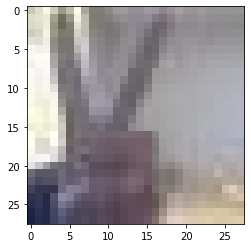

In [40]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.0555655e-01 3.4579529e-07 3.9444304e-01]
라벨: 2, 예측결과: 0


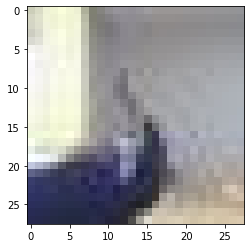

예측확률분포: [9.1673326e-01 7.8358729e-11 8.3266713e-02]
라벨: 2, 예측결과: 0


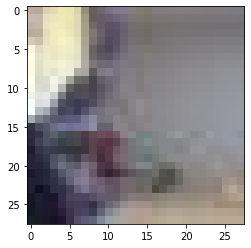

예측확률분포: [7.1378845e-01 3.3749288e-06 2.8620815e-01]
라벨: 2, 예측결과: 0


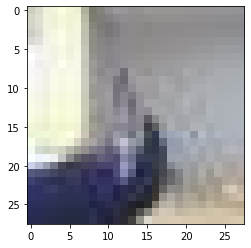

In [41]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 3개만 뽑아본다.
samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

 결론 : 데이터는 0인데 2로 잘못 추론했다. 

## 루브릭 평가 문항
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
- 트레이닝이 정상적으로 수행되었다.
- 총 train dataset 14701 test dataset 300장
- 정확도 0.97(할때 마다 조금씩 다르다...)
- 많이해볼수록 정확도가 떨어진다..그럴땐 다시 데이터를 섞어서하면 정확도가 올라간다(왜그러지..?)

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
- 첫번째 시도: 정확도 0.3  | 원인: 데이터 양이 적음(?)
- 두번째 시도: 정확도 0.3  | 원인: 데이터 양은 많으나 분류가 잘 안되서..(?)
- 세번째 시도: 정확도 0.97 | 원인: train, test 데이터를 섞어봤다! 
- 세번째 시도후 다양하게 파라미터를 변경함 그 중 최적의 파라미터는 
ch1:64, ch2:64, dense:128, epoch:15 일때 정확도가 가장 높았다.

3. 분류보델의 정확도가 기준이상 높게 나왔는가?
- 0.97 나왔다!!!!!

## 회고
1. 코드를 이용한 프로젝트는 처음이라 쉬운 문제도 나에겐 어렵게 느껴졌다.
- 간단하게 해결될 문제인거 같은데 어떻게 해야할지 모르겠어서 답답했다.
- 다행히 팀원분들이 많이 도와주셔서 덕분에 코드를 보는 방법, 어떤 부분을 주의해서 봐야하는지 알게 됐다.

2. 노드를 할때는 코드 의미를 아는데 초점을 맞춰서 공부했는데 
- 직접 프로젝트를 해보니 어떤 쓰임이 있는지 정확하게 알게 됐다.
- 파일 경로 확인하기
- x_train과 x_test, y_train과 y_test가 정의되었는지 확인하기
- 파일간 [.],[/] 의 중요성 (이전에는 뭔지 모르고 그냥 첬는데 어떤 쓰임인지 알게 됐다.)

3. 루브릭 평가에 맞추기 위해서 다양한 데이터 셋을 준비하고 정확도를 올리기 위해서 
- 여러번 파라미터를 수정했다. 프로젝트를 여러개 만들어서 계속 테스트 했는데 이 과정을 반복하니 전체적인 틀을 알게 됐다.

4. 정확도가 돌릴때마다 조금씩 다른데 퍼실님이 확인할때는 60%가 못넘을 경우 지표를 달성하지 못 할거 같다..

5. 프로젝트를 하기 전엔 내가 이런 코드를 읽고 이해하게 될 줄 몰랐다. 처음하는 프로젝트라 답답했지만 코드가 이해되고 문제를 발견할수록 재미있었다. 고생한만큼 기억에 남을거 같고 앞으로 프로젝트를 할때 어떤 부분을 고려해야할지 알게 됐다!!